[galmask: A Python package for unsupervised galaxy masking](https://arxiv.org/abs/2206.06787)

https://github.com/Yash-10/galmask/

https://www.nasa.gov/feature/goddard/2022/webb-captures-stellar-gymnastics-in-the-cartwheel-galaxy

https://arxiv.org/abs/2210.06499

https://archive.stsci.edu/doi/resolve/resolve.html?doi=10.17909/2n49-hx69

In [ ]:
%%capture 
!pip install galmask
!wget https://github.com/Yash-10/galmask/blob/main/example/gal1_G.fits 
!wget https://github.com/Yash-10/galmask/blob/main/example/gal2_R.fits
!wget https://github.com/Yash-10/galmask/blob/main/example/gal2_orig_segmap_R.fits
!wget https://github.com/Yash-10/galmask/blob/main/example/gal_seg1.fits
!wget https://github.com/Yash-10/galmask/blob/main/example/kernel.fits

In [38]:
ls -l

total 721080
-rw-rw-r-- 1 usuario usuario   9515520 jan 20 15:40 cartwheel.fits
-rw-rw-r-- 1 usuario usuario   2214720 jan 20 15:40 elliptical.fits
-rw-rw-r-- 1 usuario usuario   1108800 set 29 22:35 gal1_G.fits
-rw-rw-r-- 1 usuario usuario   4008960 set 29 22:35 gal2_orig_segmap_R.fits
-rw-rw-r-- 1 usuario usuario   2016000 set 29 22:35 gal2_R.fits
-rw-rw-r-- 1 usuario usuario    416307 jan 20 16:55 galmask_example1.png
-rw-rw-r-- 1 usuario usuario   4412160 set 29 22:35 gal_seg1.fits
-rw-rw-r-- 1 usuario usuario 622912320 dez 28 12:14 jw02727-o002_t062_nircam_clear-f090w_i2d.fits
-rw-rw-r-- 1 usuario usuario  88997760 dez 28 12:14 jw02727-o002_t062_nircam_clear-f090w_segm.fits
-rw-rw-r-- 1 usuario usuario      8640 set 29 22:35 kernel.fits
-rw-rw-r-- 1 usuario usuario      2264 set 29 22:35 show1.py
-rw-rw-r-- 1 usuario usuario      2328 set 29 22:35 show2.py
-rw-rw-r-- 1 usuario usuario   2315520 jan 20 15:40 spiralB.fits
-rw-rw-r-- 1 usuario usuario    415855 jan 19 17:58 The_Cartw

In [3]:
%%capture 
!pip install galmask
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import AsinhStretch, ImageNormalize, ZScaleInterval, LogStretch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [12]:
hdul = fits.open('cartwheel.fits')
hdul.info()

Filename: cartwheel.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (1076, 1105)   float64   


In [52]:
#from timeit import default_timer as timer
#import matplotlib.pyplot as plt
#from astropy.io import fits
#from astropy.visualization import AsinhStretch, ImageNormalize, ZScaleInterval, LogStretch

#import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc('font', family='sans-serif')

from galmask.galmask import galmask

def axes_colorbar(ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size='5%', pad=0.3)
    return cax

# filepath = 'gal1_G.fits'
filepath = 'jw02727-o002_t062_nircam_clear-f090w_i2d.fits'#'jw02727-o002_t062_nircam_clear-f090w_i2d.fits'
image = fits.getdata(filepath)
npixels =             50
nlevels =             1
nsigma =              3.
contrast =            .0001
min_distance =        1
num_peaks =           10
num_peaks_per_label = 30
connectivity =        40
remove_local_max =    False
#hdul = fits.open('jw02727-o002_t062_nircam_clear-f090w_segm.fits')
#hdul = fits.open(filepath)#'jw02727-o002_t062_nircam_clear-f090w_segm.fits')
#objects = hdul[3].data
#seg_image = objects.astype('uint8')

start = timer()
galmasked, galsegmap = galmask(
    image, npixels, nlevels, nsigma, contrast, min_distance, num_peaks, num_peaks_per_label,
    connectivity=4, kernel=fits.getdata('kernel.fits'), seg_image=None, mode="0",
    remove_local_max=True, deblend=True
)
end = timer()

print(f'Execution time: {end-start}s')

Execution time: 12.117930837999666s


/tmp/ipykernel_7351/3441319647.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im0, cax=cax0, orientation='horizontal')
/tmp/ipykernel_7351/3441319647.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im2, cax=cax2, orientation='horizontal')
/tmp/ipykernel_7351/3441319647.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im3, cax=cax3, orientation='horizontal')


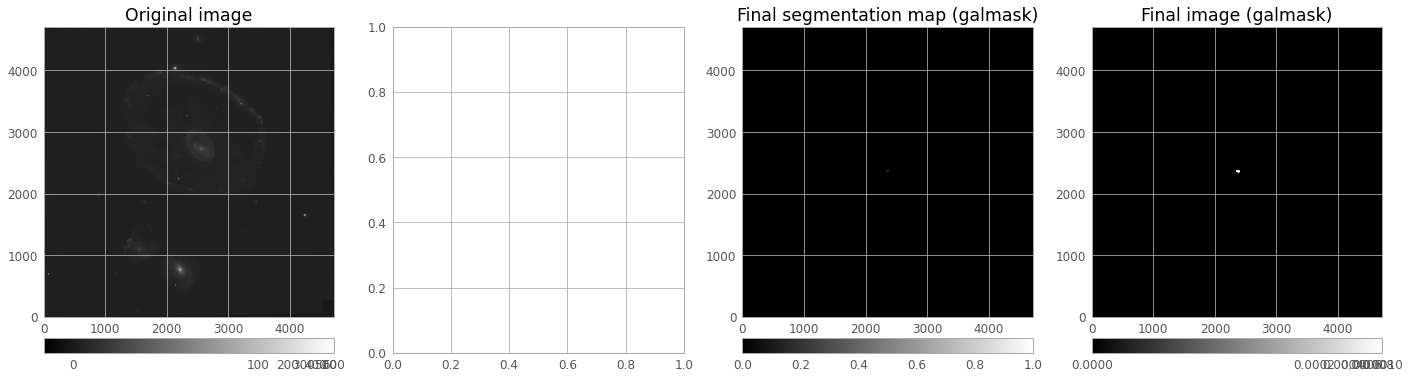

In [53]:
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

vmin = min(image.min(), galmasked.min())
vmax = max(image.max(), galmasked.max())

# fig.suptitle(filepath)
norm1 = ImageNormalize(image, vmin=vmin, vmax=vmax, stretch=LogStretch())
im0 = ax[0].imshow(image, norm=norm1, origin='lower', cmap='gray')
ax[0].set_title("Original image")
cax0 = axes_colorbar(ax[0])
fig.colorbar(im0, cax=cax0, orientation='horizontal')

#im1 = ax[1].imshow(objects, origin='lower')
#ax[1].set_title("Original segmentation map (NoiseChisel)")
#cax1 = axes_colorbar(ax[1])
#fig.colorbar(im1, cax=cax1, orientation='horizontal')

im2 = ax[2].imshow(galsegmap, origin='lower', cmap='gray')
ax[2].set_title("Final segmentation map (galmask)")
cax2 = axes_colorbar(ax[2])
fig.colorbar(im2, cax=cax2, orientation='horizontal')

norm2 = ImageNormalize(galmasked, vmin=0, vmax=0.001, stretch=LogStretch())
im3 = ax[3].imshow(galmasked, norm=norm2, origin='lower', cmap='gray')
ax[3].set_title("Final image (galmask)")
cax3 = axes_colorbar(ax[3])
fig.colorbar(im3, cax=cax3, orientation='horizontal')

plt.savefig('galmask_example1.png', bbox_inches='tight', dpi=400)

plt.show()

In [23]:
image_file = 'gal1_G.fits'
image_file = 'gal_seg1.fits'
image_file =  'kernel.fits'
image_file = 'jw02727-o002_t062_nircam_clear-f090w_i2d.fits'
image_data = fits.getdata(image_file)

/tmp/ipykernel_28485/1079643025.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/tmp/ipykernel_28485/1079643025.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


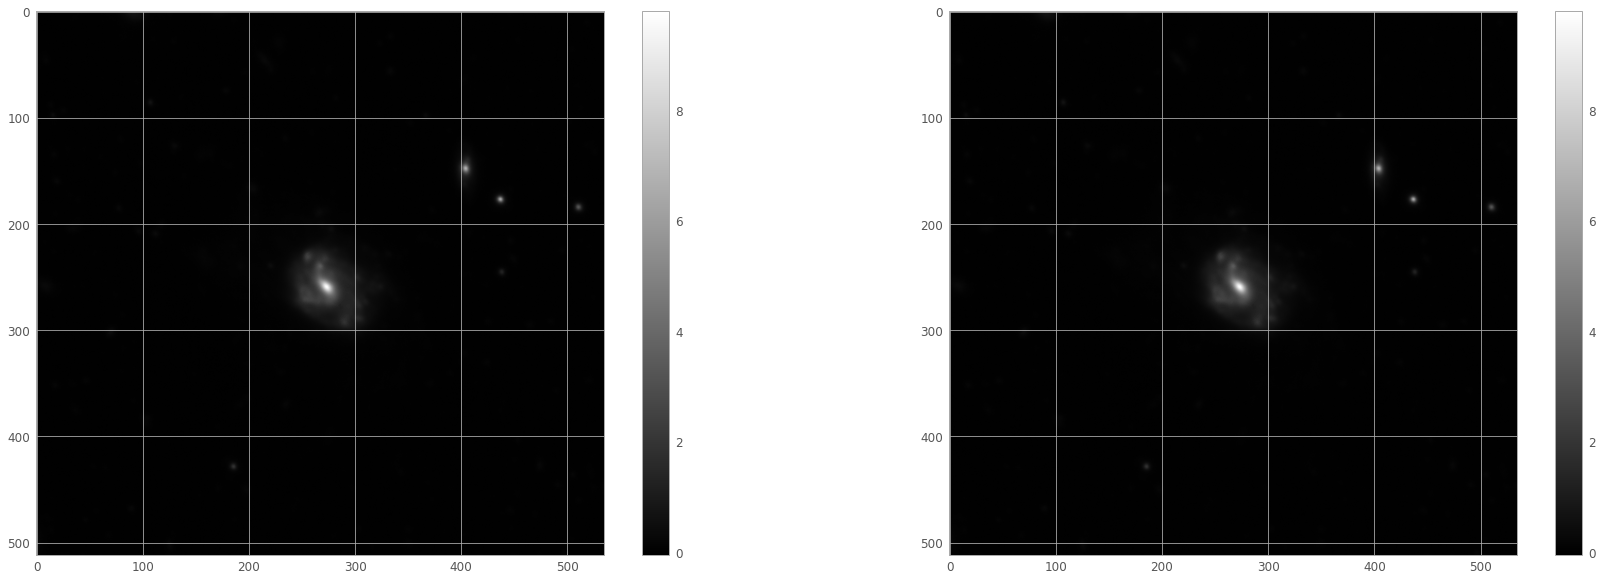

In [49]:
#plot image_data with a color map of gray in a range of 0 to 100
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(fits.getdata('gal1_G.fits'), cmap='gray')#, vmin=0, vmax=1)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(fits.getdata('gal_seg1.fits'), cmap='gray')#, vmin=0, vmax=1)
plt.colorbar()
plt.show()

/tmp/ipykernel_28485/2336961163.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/tmp/ipykernel_28485/2336961163.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


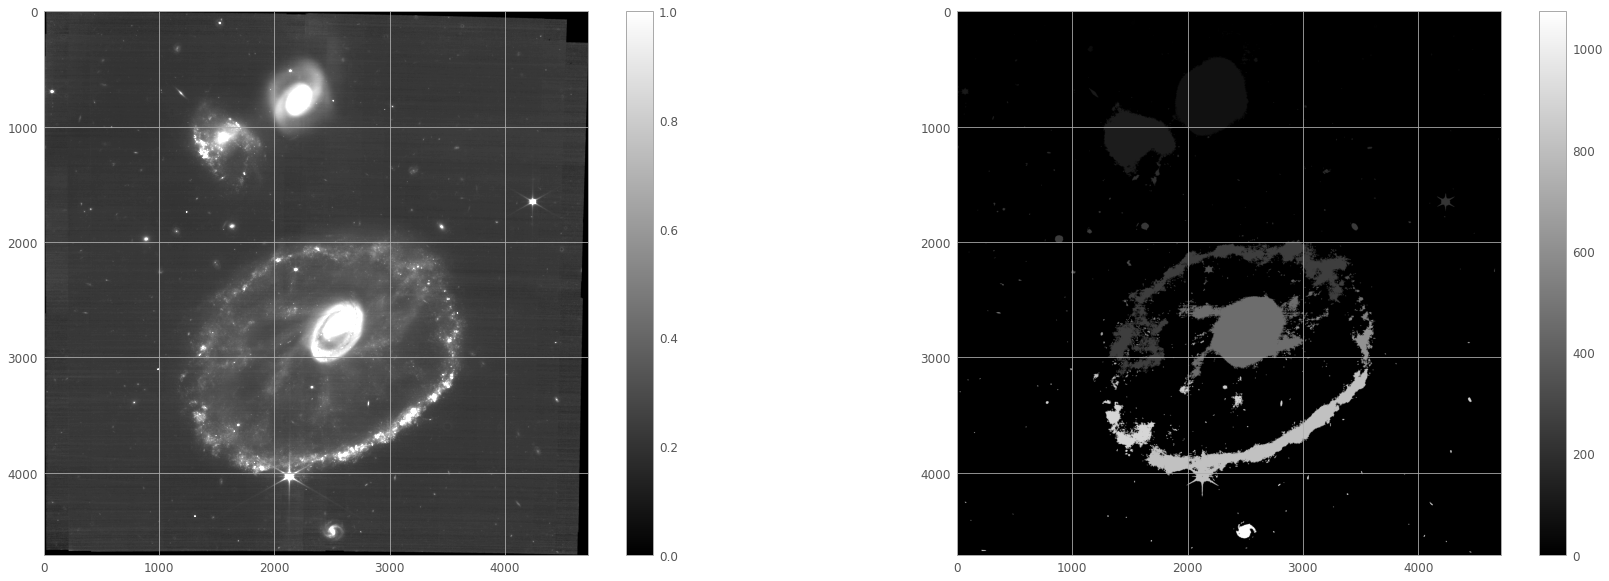

In [46]:
#plot image_data with a color map of gray in a range of 0 to 100
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(fits.getdata('jw02727-o002_t062_nircam_clear-f090w_i2d.fits'), cmap='gray', vmin=0, vmax=1)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(fits.getdata('jw02727-o002_t062_nircam_clear-f090w_segm.fits'), cmap='gray')#, vmin=0, vmax=1)
plt.colorbar()
plt.show()
